In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [2]:
# Define the ticker symbols for the indexes you want
indexes = ['^GSPC', '^DJI', '^IXIC', '^RUT']  # S&P 500, Dow Jones, Nasdaq, Russell 2000

# Download the historical data for the indexes
data = yf.download(indexes, start='2020-01-01', end='2025-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [4]:
df = data.reset_index()
df = pd.DataFrame(df.values)
df.columns = [	'Date', '^GSPC', '^DJI', '^IXIC', '^RUT' ]
df = df.set_index('Date')

In [5]:
df.head()

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2020-01-02,28868.800781,3257.850098,9092.19043,1666.77002
2020-01-03,28634.880859,3234.850098,9020.769531,1660.869995
2020-01-06,28703.380859,3246.280029,9071.469727,1663.26001
2020-01-07,28583.679688,3237.179932,9068.580078,1658.310059
2020-01-08,28745.089844,3253.050049,9129.240234,1663.589966


first thing we can notice is values of indexes are much higher than singles stocks. That is natural given that indexes are baskets of mini stocks

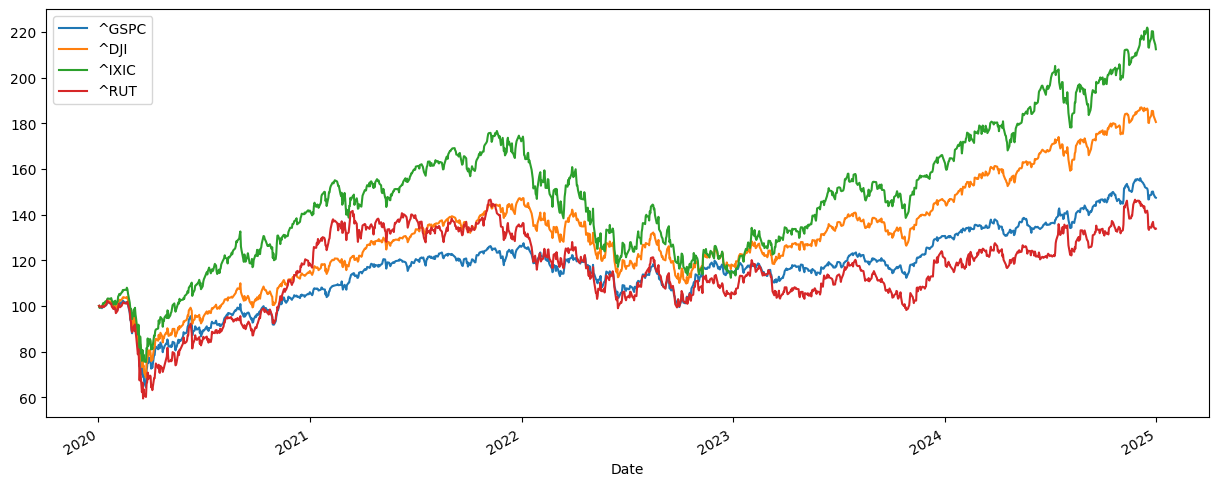

In [6]:
((df/df.iloc[0])*100).plot(figsize=(15,6))
plt.show()

In [7]:
## returns of indexes
index_returns = (df/df.shift(1))-1
index_returns.head()

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.008103,-0.00706,-0.007855,-0.00354
2020-01-06,0.002392,0.003533,0.00562,0.001439
2020-01-07,-0.00417,-0.002803,-0.000319,-0.002976
2020-01-08,0.005647,0.004902,0.006689,0.003184


In [8]:
annual_idx_returns = index_returns.mean()*250
annual_idx_returns

,0
^GSPC,0.098677
^DJI,0.140217
^IXIC,0.182172
^RUT,0.097062


all 4 are positive. implecation is, listed companies under indexes have provided positive rate of return over the considered years.

Nasdaq has produced better results than the rest

**Lets compare a stock against indexes**

In [15]:
tickers = ['AAPL' , '^DJI', '^IXIC']  # S&P 500, Dow Jones, Nasdaq, Russell 2000

data = yf.download(tickers, start='2020-01-01', end='2025-01-01')['Close']

[*********************100%***********************]  3 of 3 completed


In [16]:
df = data.reset_index()
df = pd.DataFrame(df.values)
df.columns = [	'Date', 'AAPL' , '^DJI', '^IXIC' ]
df = df.set_index('Date')

In [17]:
df.head()

,AAPL,^DJI,^IXIC
Date,,,
2020-01-02,72.716087,28868.800781,9092.19043
2020-01-03,72.009125,28634.880859,9020.769531
2020-01-06,72.582909,28703.380859,9071.469727
2020-01-07,72.241547,28583.679688,9068.580078
2020-01-08,73.403656,28745.089844,9129.240234


**Normalized Chart**

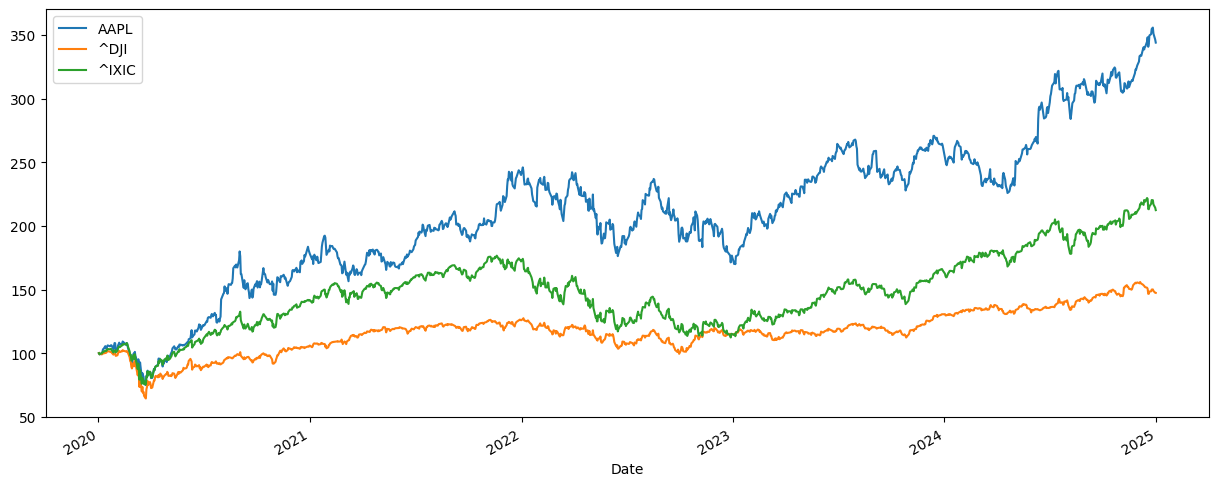

In [18]:
((df/df.iloc[0])*100).plot(figsize=(15,6))
plt.show()

Apple has performed better for last few years compared to Dow Jones & Nasdaq